In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/dirty_cafe_sales.csv"
df = pd.read_csv(file_path)

In [2]:
# Section 1: Drop Unnecessary Columns
df.drop(columns=["Payment Method", "Location"], inplace=True)
print("\nAfter Dropping Columns:")
print(df.head())


After Dropping Columns:
  Transaction ID    Item Quantity Price Per Unit Total Spent Transaction Date
0    TXN_1961373  Coffee        2            2.0         4.0       2023-09-08
1    TXN_4977031    Cake        4            3.0        12.0       2023-05-16
2    TXN_4271903  Cookie        4            1.0       ERROR       2023-07-19
3    TXN_7034554   Salad        2            5.0        10.0       2023-04-27
4    TXN_3160411  Coffee        2            2.0         4.0       2023-06-11


In [3]:
# Section 2: Convert 'Transaction Date' to Numeric
df['Transaction Date'] = df['Transaction Date'].str.replace('-', '', regex=True)
df['Transaction Date'] = pd.to_numeric(df['Transaction Date'], errors='coerce')
print("\nAfter Converting 'Transaction Date' to Numeric:")
print(df[['Transaction Date']].head())


After Converting 'Transaction Date' to Numeric:
   Transaction Date
0        20230908.0
1        20230516.0
2        20230719.0
3        20230427.0
4        20230611.0


In [4]:
# Section 3: Convert 'Item' to Categorical
df['Item'] = df['Item'].astype('category')
print("\nAfter Converting 'Item' to Categorical:")
print(df[['Item']].head())


After Converting 'Item' to Categorical:
     Item
0  Coffee
1    Cake
2  Cookie
3   Salad
4  Coffee


In [5]:
# Section 4: Drop NaN, ERROR, UNKNOWN
df.replace(["ERROR", "UNKNOWN"], np.nan, inplace=True)
df.dropna(inplace=True)
print("\nAfter Dropping NaN, ERROR, UNKNOWN:")
print(df.head())

# Section 5: Remove Noisy Data (Outliers)
z_scores = np.abs((df['Item'].cat.codes - df['Item'].cat.codes.mean()) / df['Item'].cat.codes.std())
df = df[z_scores < 3]
print("\nAfter Removing Noisy Data:")
print(df.head())


After Dropping NaN, ERROR, UNKNOWN:
  Transaction ID      Item Quantity Price Per Unit Total Spent  \
0    TXN_1961373    Coffee        2            2.0         4.0   
1    TXN_4977031      Cake        4            3.0        12.0   
3    TXN_7034554     Salad        2            5.0        10.0   
4    TXN_3160411    Coffee        2            2.0         4.0   
5    TXN_2602893  Smoothie        5            4.0        20.0   

   Transaction Date  
0        20230908.0  
1        20230516.0  
3        20230427.0  
4        20230611.0  
5        20230331.0  

After Removing Noisy Data:
  Transaction ID      Item Quantity Price Per Unit Total Spent  \
0    TXN_1961373    Coffee        2            2.0         4.0   
1    TXN_4977031      Cake        4            3.0        12.0   
3    TXN_7034554     Salad        2            5.0        10.0   
4    TXN_3160411    Coffee        2            2.0         4.0   
5    TXN_2602893  Smoothie        5            4.0        20.0   

   Transa

<ipython-input-5-b7a3390bb114>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df.replace(["ERROR", "UNKNOWN"], np.nan, inplace=True)


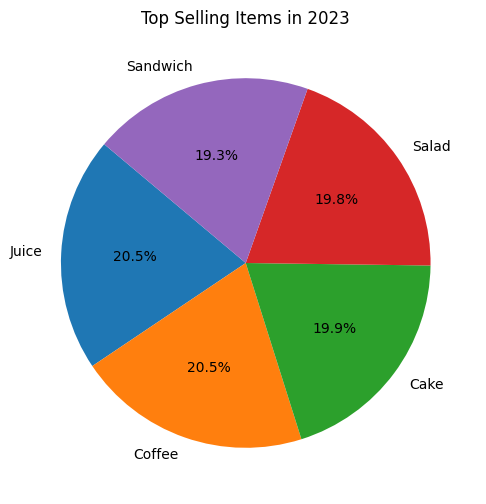

In [6]:
# Section 6: Generate Top-Selling Items per Month & Year
# Convert 'Transaction Date' back to datetime for grouping
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], format='%Y%m%d', errors='coerce')
df.dropna(subset=['Transaction Date'], inplace=True)

df['Year'] = df['Transaction Date'].dt.year
df['Month'] = df['Transaction Date'].dt.month

def plot_pie(data, title):
    top_items = data['Item'].value_counts().head(5)
    plt.figure(figsize=(6, 6))
    plt.pie(top_items, labels=top_items.index, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.show()

# Plot yearly sales
for year in df['Year'].unique():
    yearly_data = df[df['Year'] == year]
    plot_pie(yearly_data, f'Top Selling Items in {year}')

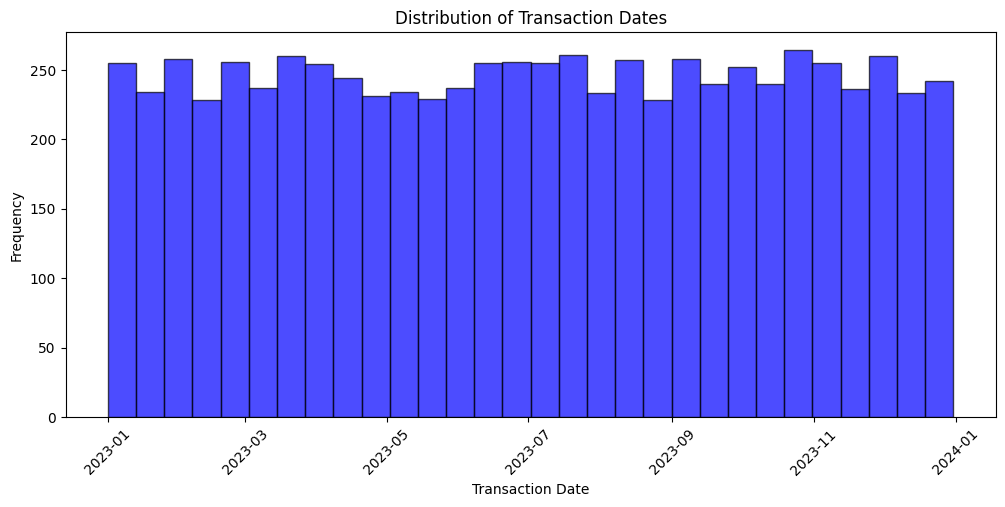

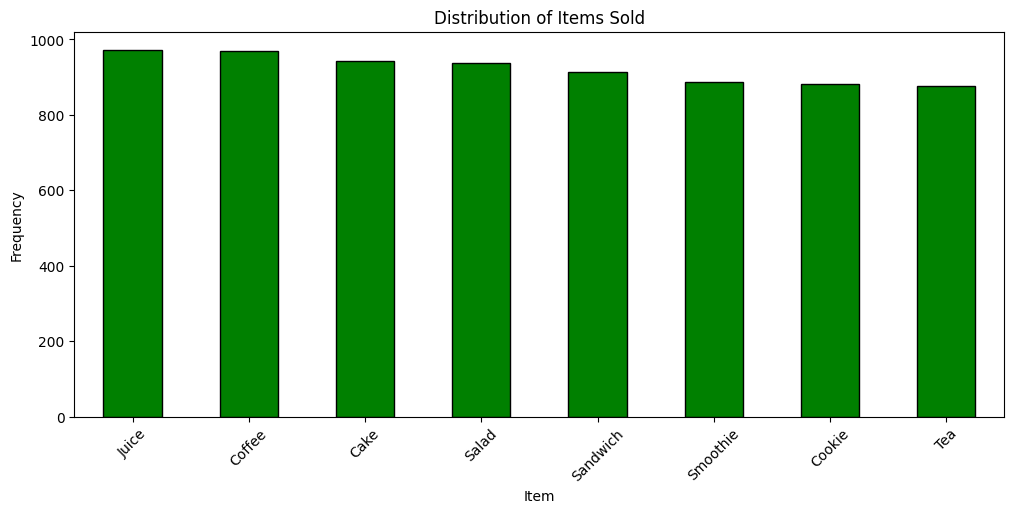

In [7]:
# Step 8: Distribution of Transaction Date and Item
plt.figure(figsize=(12, 5))
plt.hist(df['Transaction Date'].dropna(), bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Transaction Date')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Dates')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 5))
df['Item'].value_counts().plot(kind='bar', color='green', edgecolor='black')
plt.xlabel('Item')
plt.ylabel('Frequency')
plt.title('Distribution of Items Sold')
plt.xticks(rotation=45)
plt.show()

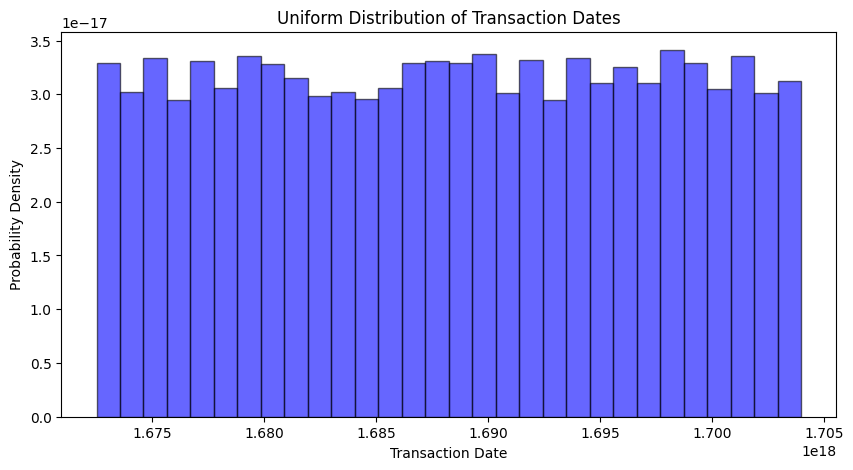

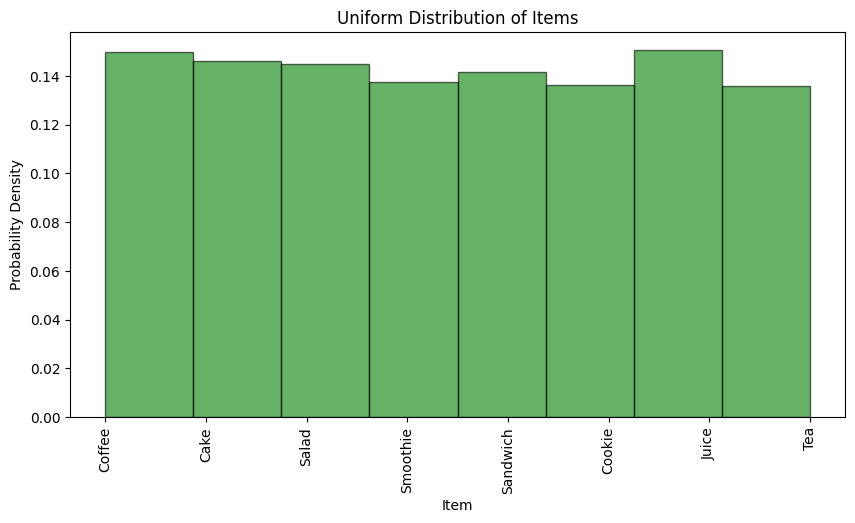

In [9]:
# Uniform Distribution of Transaction Date
plt.figure(figsize=(10, 5))
n, bins, patches = plt.hist(df['Transaction Date'].astype(int), bins=30, density=True, alpha=0.6, color='b', edgecolor='black')
plt.xlabel('Transaction Date')
plt.ylabel('Probability Density')
plt.title('Uniform Distribution of Transaction Dates')
plt.show()

# Uniform Distribution of Items
plt.figure(figsize=(10, 5))
n, bins, patches = plt.hist(df['Item'].astype(str), bins=len(df['Item'].unique()), density=True, alpha=0.6, color='g', edgecolor='black')
plt.xlabel('Item')
plt.ylabel('Probability Density')
plt.title('Uniform Distribution of Items')
plt.xticks(rotation=90)
plt.show()

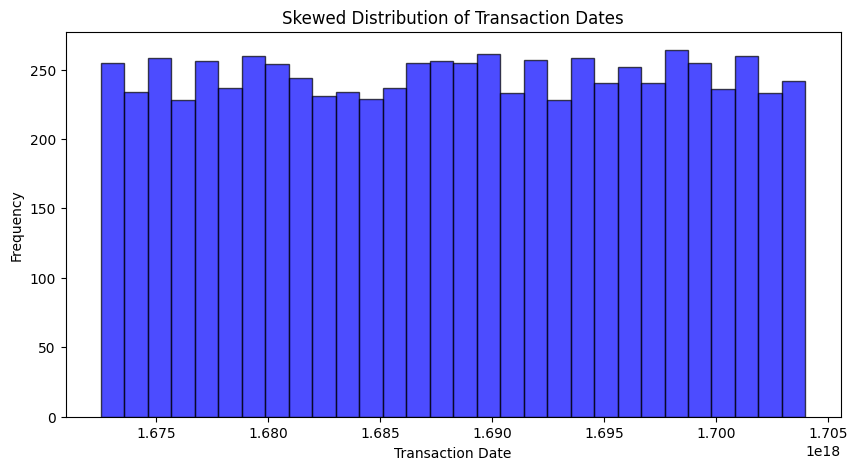

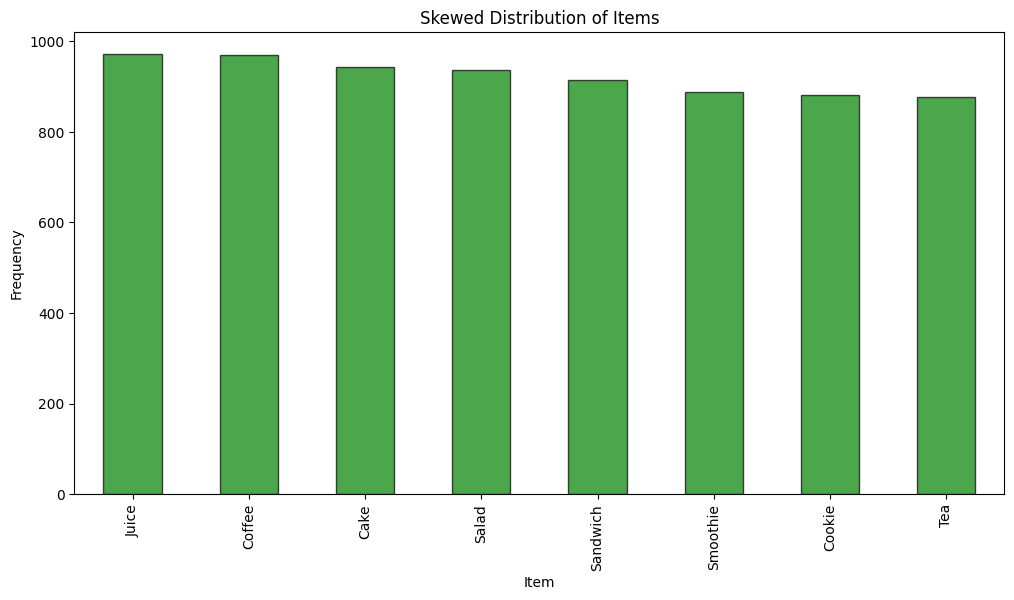

In [11]:
# Skewed Distribution of Transaction Date
plt.figure(figsize=(10, 5))
plt.hist(df['Transaction Date'].astype(int), bins=30, color='b', edgecolor='black', alpha=0.7)
plt.xlabel('Transaction Date')
plt.ylabel('Frequency')
plt.title('Skewed Distribution of Transaction Dates')
plt.show()

# Skewed Distribution of Items
plt.figure(figsize=(12, 6))
df['Item'].value_counts().plot(kind='bar', color='g', edgecolor='black', alpha=0.7)
plt.xlabel('Item')
plt.ylabel('Frequency')
plt.title('Skewed Distribution of Items')
plt.xticks(rotation=90)
plt.show()


In [12]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower()

# Convert 'transaction_date' to string format YYYYMMDD
df['transaction date'] = pd.to_datetime(df['transaction date'], errors='coerce').dt.strftime('%Y%m%d')
df = df.dropna(subset=['item'])

# Create the association table
correlation_table = df.groupby('transaction date')['item'].apply(list).reset_index()
print(correlation_table)




    transaction date                                               item
0           20230101  [Juice, Sandwich, Tea, Salad, Coffee, Sandwich...
1           20230102  [Sandwich, Cookie, Smoothie, Salad, Cookie, Ca...
2           20230103  [Cake, Salad, Sandwich, Cookie, Coffee, Cake, ...
3           20230104  [Coffee, Tea, Coffee, Salad, Coffee, Smoothie,...
4           20230105  [Coffee, Cake, Sandwich, Tea, Sandwich, Coffee...
..               ...                                                ...
360         20231227  [Cookie, Salad, Cake, Salad, Tea, Juice, Smoot...
361         20231228  [Cookie, Smoothie, Juice, Juice, Tea, Cookie, ...
362         20231229  [Smoothie, Cake, Juice, Juice, Cake, Salad, Te...
363         20231230  [Tea, Cookie, Cake, Cookie, Salad, Salad, Tea,...
364         20231231  [Sandwich, Salad, Juice, Cake, Salad, Tea, Smo...

[365 rows x 2 columns]


In [13]:
cor_item = correlation_table["item"]
cor_item_array = np.array([])

for value in cor_item:
  print(value)

['Juice', 'Sandwich', 'Tea', 'Salad', 'Coffee', 'Sandwich', 'Cake', 'Coffee', 'Coffee', 'Cookie', 'Juice', 'Coffee', 'Smoothie', 'Cake']
['Sandwich', 'Cookie', 'Smoothie', 'Salad', 'Cookie', 'Cake', 'Smoothie', 'Coffee', 'Cake', 'Sandwich', 'Salad', 'Cake', 'Tea', 'Tea', 'Tea']
['Cake', 'Salad', 'Sandwich', 'Cookie', 'Coffee', 'Cake', 'Juice', 'Cookie', 'Sandwich', 'Juice', 'Cookie', 'Juice', 'Cake', 'Cake']
['Coffee', 'Tea', 'Coffee', 'Salad', 'Coffee', 'Smoothie', 'Sandwich', 'Cake', 'Coffee', 'Sandwich', 'Smoothie', 'Sandwich', 'Tea', 'Smoothie', 'Sandwich', 'Juice', 'Salad', 'Cookie', 'Salad', 'Coffee', 'Salad']
['Coffee', 'Cake', 'Sandwich', 'Tea', 'Sandwich', 'Coffee', 'Cookie', 'Sandwich', 'Smoothie', 'Sandwich', 'Cake', 'Cookie', 'Tea', 'Salad', 'Tea', 'Coffee', 'Juice', 'Juice', 'Salad', 'Salad', 'Cake', 'Juice', 'Salad', 'Salad', 'Salad', 'Juice', 'Salad', 'Salad', 'Tea', 'Salad', 'Smoothie', 'Cookie']
['Sandwich', 'Juice', 'Coffee', 'Salad', 'Coffee', 'Smoothie', 'Tea', 'Cak

In [14]:
cor_item_arr = cor_item.to_numpy()

cor_item_arr[0]

['Juice',
 'Sandwich',
 'Tea',
 'Salad',
 'Coffee',
 'Sandwich',
 'Cake',
 'Coffee',
 'Coffee',
 'Cookie',
 'Juice',
 'Coffee',
 'Smoothie',
 'Cake']

In [15]:
from mlxtend.preprocessing import TransactionEncoder

In [16]:
te = TransactionEncoder();

transactions_ar = te.fit(cor_item_arr).transform(cor_item_arr)
TrDataframe = pd.DataFrame(transactions_ar ,  columns= te.columns_)

TrDataframe

,Cake,Coffee,Cookie,Juice,Salad,Sandwich,Smoothie,Tea
0,True,True,True,True,True,True,True,True
1,True,True,True,False,True,True,True,True
2,True,True,True,True,True,True,False,False
3,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
360,True,True,True,True,True,True,True,True
361,True,True,True,True,True,False,True,True
362,True,False,True,True,True,True,True,True
363,True,True,True,True,True,False,True,True


In [17]:
from mlxtend.frequent_patterns import apriori

frequentSet =apriori(TrDataframe, min_support= 0.2 , use_colnames=True)
frequentSet

,support,itemsets
0,0.912329,(Cake)
1,0.939726,(Coffee)
2,0.917808,(Cookie)
3,0.939726,(Juice)
4,0.945205,(Salad)
...,...,...
250,0.583562,"(Smoothie, Cake, Cookie, Coffee, Salad, Sandwi..."
251,0.597260,"(Smoothie, Cake, Juice, Coffee, Salad, Sandwic..."
252,0.575342,"(Smoothie, Cake, Juice, Cookie, Salad, Sandwic..."
253,0.605479,"(Smoothie, Juice, Cookie, Coffee, Salad, Sandw..."


In [18]:
from mlxtend.frequent_patterns import association_rules
rules =association_rules(frequentSet, metric="confidence", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Cake),(Coffee),0.912329,0.939726,0.860274,0.942943,1.003423,1.0,0.002935,1.056381,0.038913,0.867403,0.053372,0.929197
1,(Coffee),(Cake),0.939726,0.912329,0.860274,0.915452,1.003423,1.0,0.002935,1.036939,0.056601,0.867403,0.035623,0.929197
2,(Cookie),(Cake),0.917808,0.912329,0.838356,0.913433,1.001210,1.0,0.001013,1.012754,0.014706,0.845304,0.012593,0.916176
3,(Cake),(Cookie),0.912329,0.917808,0.838356,0.918919,1.001210,1.0,0.001013,1.013699,0.013787,0.845304,0.013514,0.916176
4,(Juice),(Cake),0.939726,0.912329,0.857534,0.912536,1.000228,1.0,0.000195,1.002374,0.003776,0.862259,0.002369,0.926238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,"(Smoothie, Sandwich, Cake)","(Juice, Cookie, Coffee, Salad, Tea)",0.764384,0.715068,0.547945,0.716846,1.002486,1.0,0.001359,1.006277,0.010523,0.588235,0.006238,0.741565
5630,"(Smoothie, Sandwich, Cookie)","(Cake, Juice, Coffee, Salad, Tea)",0.780822,0.717808,0.547945,0.701754,0.977635,1.0,-0.012535,0.946172,-0.094510,0.576369,-0.056890,0.732557
5631,"(Sandwich, Cookie, Cake)","(Smoothie, Juice, Coffee, Salad, Tea)",0.767123,0.723288,0.547945,0.714286,0.987554,1.0,-0.006906,0.968493,-0.051339,0.581395,-0.032532,0.735931
5632,"(Salad, Sandwich, Cake)","(Smoothie, Juice, Cookie, Coffee, Tea)",0.780822,0.704110,0.547945,0.701754,0.996655,1.0,-0.001839,0.992103,-0.015082,0.584795,-0.007960,0.739982


In [19]:
for i , row in rules.iterrows():
    print(f"{i+1} - {list(row.antecedents)} -> {list(row.consequents)} = [support = {row.support} , confidence = {row.confidence}, lift ={row.lift}] , dependent = {row.lift != 1.0}" )

Streaming output truncated to the last 5000 lines.
635 - ['Smoothie', 'Juice'] -> ['Cookie', 'Cake'] = [support = 0.7178082191780822 , confidence = 0.8317460317460318, lift =0.9921153646643843] , dependent = True
636 - ['Smoothie', 'Cookie'] -> ['Juice', 'Cake'] = [support = 0.7178082191780822 , confidence = 0.8506493506493508, lift =0.9919712874984441] , dependent = True
637 - ['Smoothie', 'Cake'] -> ['Juice', 'Cookie'] = [support = 0.7178082191780822 , confidence = 0.859016393442623, lift =0.9985381643520936] , dependent = True
638 - ['Juice', 'Cookie'] -> ['Smoothie', 'Cake'] = [support = 0.7178082191780822 , confidence = 0.8343949044585988, lift =0.9985381643520936] , dependent = True
639 - ['Juice', 'Cake'] -> ['Smoothie', 'Cookie'] = [support = 0.7178082191780822 , confidence = 0.8370607028753994, lift =0.9919712874984441] , dependent = True
640 - ['Cookie', 'Cake'] -> ['Smoothie', 'Juice'] = [support = 0.7178082191780822 , confidence = 0.8562091503267975, lift =0.992115364664384

In [20]:
from mlxtend.frequent_patterns import apriori

frequentSet =apriori(TrDataframe, min_support= 0.5 , use_colnames=True)
frequentSet

,support,itemsets
0,0.912329,(Cake)
1,0.939726,(Coffee)
2,0.917808,(Cookie)
3,0.939726,(Juice)
4,0.945205,(Salad)
...,...,...
250,0.583562,"(Smoothie, Cake, Cookie, Coffee, Salad, Sandwi..."
251,0.597260,"(Smoothie, Cake, Juice, Coffee, Salad, Sandwic..."
252,0.575342,"(Smoothie, Cake, Juice, Cookie, Salad, Sandwic..."
253,0.605479,"(Smoothie, Juice, Cookie, Coffee, Salad, Sandw..."


In [21]:
from mlxtend.frequent_patterns import association_rules
rules =association_rules(frequentSet, metric="confidence", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Cake),(Coffee),0.912329,0.939726,0.860274,0.942943,1.003423,1.0,0.002935,1.056381,0.038913,0.867403,0.053372,0.929197
1,(Coffee),(Cake),0.939726,0.912329,0.860274,0.915452,1.003423,1.0,0.002935,1.036939,0.056601,0.867403,0.035623,0.929197
2,(Cookie),(Cake),0.917808,0.912329,0.838356,0.913433,1.001210,1.0,0.001013,1.012754,0.014706,0.845304,0.012593,0.916176
3,(Cake),(Cookie),0.912329,0.917808,0.838356,0.918919,1.001210,1.0,0.001013,1.013699,0.013787,0.845304,0.013514,0.916176
4,(Juice),(Cake),0.939726,0.912329,0.857534,0.912536,1.000228,1.0,0.000195,1.002374,0.003776,0.862259,0.002369,0.926238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,"(Smoothie, Sandwich, Cake)","(Juice, Cookie, Coffee, Salad, Tea)",0.764384,0.715068,0.547945,0.716846,1.002486,1.0,0.001359,1.006277,0.010523,0.588235,0.006238,0.741565
5630,"(Smoothie, Sandwich, Cookie)","(Cake, Juice, Coffee, Salad, Tea)",0.780822,0.717808,0.547945,0.701754,0.977635,1.0,-0.012535,0.946172,-0.094510,0.576369,-0.056890,0.732557
5631,"(Sandwich, Cookie, Cake)","(Smoothie, Juice, Coffee, Salad, Tea)",0.767123,0.723288,0.547945,0.714286,0.987554,1.0,-0.006906,0.968493,-0.051339,0.581395,-0.032532,0.735931
5632,"(Salad, Sandwich, Cake)","(Smoothie, Juice, Cookie, Coffee, Tea)",0.780822,0.704110,0.547945,0.701754,0.996655,1.0,-0.001839,0.992103,-0.015082,0.584795,-0.007960,0.739982


In [22]:
for i , row in rules.iterrows():
    print(f"{i+1} - {list(row.antecedents)} -> {list(row.consequents)} = [support = {row.support} , confidence = {row.confidence}, lift ={row.lift}] , dependent = {row.lift != 1.0}" )

Streaming output truncated to the last 5000 lines.
635 - ['Smoothie', 'Juice'] -> ['Cookie', 'Cake'] = [support = 0.7178082191780822 , confidence = 0.8317460317460318, lift =0.9921153646643843] , dependent = True
636 - ['Smoothie', 'Cookie'] -> ['Juice', 'Cake'] = [support = 0.7178082191780822 , confidence = 0.8506493506493508, lift =0.9919712874984441] , dependent = True
637 - ['Smoothie', 'Cake'] -> ['Juice', 'Cookie'] = [support = 0.7178082191780822 , confidence = 0.859016393442623, lift =0.9985381643520936] , dependent = True
638 - ['Juice', 'Cookie'] -> ['Smoothie', 'Cake'] = [support = 0.7178082191780822 , confidence = 0.8343949044585988, lift =0.9985381643520936] , dependent = True
639 - ['Juice', 'Cake'] -> ['Smoothie', 'Cookie'] = [support = 0.7178082191780822 , confidence = 0.8370607028753994, lift =0.9919712874984441] , dependent = True
640 - ['Cookie', 'Cake'] -> ['Smoothie', 'Juice'] = [support = 0.7178082191780822 , confidence = 0.8562091503267975, lift =0.992115364664384

In [23]:
from mlxtend.frequent_patterns import apriori

frequentSet =apriori(TrDataframe, min_support= 0.8 , use_colnames=True)
frequentSet

,support,itemsets
0,0.912329,(Cake)
1,0.939726,(Coffee)
2,0.917808,(Cookie)
3,0.939726,(Juice)
4,0.945205,(Salad)
...,...,...
63,0.808219,"(Juice, Sandwich, Tea)"
64,0.810959,"(Smoothie, Juice, Tea)"
65,0.808219,"(Salad, Sandwich, Tea)"
66,0.816438,"(Smoothie, Salad, Tea)"


In [24]:
from mlxtend.frequent_patterns import association_rules
rules =association_rules(frequentSet, metric="confidence", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Cake),(Coffee),0.912329,0.939726,0.860274,0.942943,1.003423,1.0,0.002935,1.056381,0.038913,0.867403,0.053372,0.929197
1,(Coffee),(Cake),0.939726,0.912329,0.860274,0.915452,1.003423,1.0,0.002935,1.036939,0.056601,0.867403,0.035623,0.929197
2,(Cookie),(Cake),0.917808,0.912329,0.838356,0.913433,1.001210,1.0,0.001013,1.012754,0.014706,0.845304,0.012593,0.916176
3,(Cake),(Cookie),0.912329,0.917808,0.838356,0.918919,1.001210,1.0,0.001013,1.013699,0.013787,0.845304,0.013514,0.916176
4,(Juice),(Cake),0.939726,0.912329,0.857534,0.912536,1.000228,1.0,0.000195,1.002374,0.003776,0.862259,0.002369,0.926238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,"(Smoothie, Tea)",(Sandwich),0.868493,0.920548,0.800000,0.921136,1.000638,1.0,0.000510,1.007452,0.004852,0.808864,0.007397,0.895092
244,"(Sandwich, Tea)",(Smoothie),0.860274,0.920548,0.800000,0.929936,1.010199,1.0,0.008077,1.133998,0.072254,0.815642,0.118164,0.899492
245,(Smoothie),"(Sandwich, Tea)",0.920548,0.860274,0.800000,0.869048,1.010199,1.0,0.008077,1.066999,0.127067,0.815642,0.062792,0.899492
246,(Sandwich),"(Smoothie, Tea)",0.920548,0.868493,0.800000,0.869048,1.000638,1.0,0.000510,1.004234,0.008030,0.808864,0.004216,0.895092


In [25]:
for i , row in rules.iterrows():
    print(f"{i+1} - {list(row.antecedents)} -> {list(row.consequents)} = [support = {row.support} , confidence = {row.confidence}, lift ={row.lift}] , dependent = {row.lift != 1.0}" )

1 - ['Cake'] -> ['Coffee'] = [support = 0.8602739726027397 , confidence = 0.9429429429429429, lift =1.0034232483212073] , dependent = True
2 - ['Coffee'] -> ['Cake'] = [support = 0.8602739726027397 , confidence = 0.9154518950437318, lift =1.0034232483212076] , dependent = True
3 - ['Cookie'] -> ['Cake'] = [support = 0.8383561643835616 , confidence = 0.9134328358208955, lift =1.0012101653892698] , dependent = True
4 - ['Cake'] -> ['Cookie'] = [support = 0.8383561643835616 , confidence = 0.9189189189189189, lift =1.0012101653892698] , dependent = True
5 - ['Juice'] -> ['Cake'] = [support = 0.8575342465753425 , confidence = 0.9125364431486881, lift =1.000227632880694] , dependent = True
6 - ['Cake'] -> ['Juice'] = [support = 0.8575342465753425 , confidence = 0.93993993993994, lift =1.000227632880694] , dependent = True
7 - ['Salad'] -> ['Cake'] = [support = 0.8602739726027397 , confidence = 0.9101449275362319, lift =0.997606301954128] , dependent = True
8 - ['Cake'] -> ['Salad'] = [suppor